#Text classification with bag of words

Outline:

- Download and explore the dataset
- Apply text preprocessing techniques
- Implement the bag of words model
- Train ML models for text classification
- Make predictions and submit to Kaggle


## Download and explore the dataset

Outline:

1. Download the dataset from Kaggle to Colab
2. Explore the data using Pandas
3. Create a small working sample



### Download the dataset to Colab

In [11]:
!ls .

kaggle.json  sample_data


In [12]:
!chmod 600 ./kaggle.json

In [17]:
!kaggle config view

Configuration values from .
- username: laurentfotso
- path: None
- proxy: None
- competition: None


In [18]:
!kaggle --version

Kaggle API 1.5.12


In [19]:
import os

In [20]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [25]:
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

  0% 0.00/4.09M [00:00<?, ?B/s]
100% 4.09M/4.09M [00:00<00:00, 127MB/s]


In [23]:
!unzip ./data/train.csv.zip 

Archive:  ./data/train.csv.zip
  inflating: train.csv               


### Explore the data using Pandas

In [26]:
train_fname = './data/train.csv.zip'
test_fname = './data/test.csv.zip'
sample_fname = './data/sample_submission.csv.zip'

In [27]:
import pandas as pd

In [28]:
raw_df = pd.read_csv(train_fname)

In [29]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [35]:
sincere_df = raw_df[raw_df.target == 1]

In [36]:
sincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [37]:
insincere_df = raw_df[raw_df.target == 0]
insincere_df.question_text.values[:10]


array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [39]:
raw_df.target.value_counts(normalize=1)

0    0.93813
1    0.06187
Name: target, dtype: float64

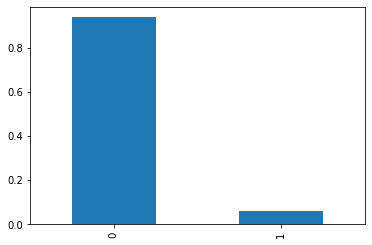

In [40]:
raw_df.target.value_counts(normalize=1).plot(kind='bar')

In [43]:
test_df = pd.read_csv(test_fname)

In [44]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [47]:
sub_df = pd.read_csv(sample_fname)
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


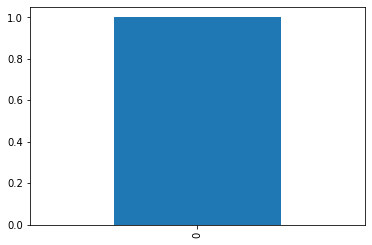

In [46]:
sub_df.prediction.value_counts(normalize=1).plot(kind='bar')

### Create a small working sample


In [48]:
SAMPLE_SIZE = 100_000

In [49]:
sample_df = raw_df.sample(SAMPLE_SIZE,random_state=42)

In [50]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


# Apply text preprocessing techniques

Outline:

    1. Understand the bag of words model
    2. Tokenization
    3. Stop word removal 
    4. Stemming

## Bag of words intuition

1. Create a list of all the words across all the text documents
2. You convert each document into vector counts of each word

Limitations:

1. There may be too many words in the dataset
2.   Some words may occur too frequently
3.    Some words may occur very rarely or only once
4.    A single word may have many forms (go, gone, going or bird vs. birds)


In [51]:
q0 = sincere_df.question_text.values[1]
q0

'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?'

In [52]:
q1 = raw_df[raw_df.target == 1].question_text.values[0]
q1

'Has the United States become the largest dictatorship in the world?'

### Tokenization

```
# Spliting words using ponctuation
```

In [57]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [70]:
q1_tok = word_tokenize(q1)
q0_tok = word_tokenize(q0)
q1_tok

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

### Stop word removal

Removing commonly occuring words

In [63]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [66]:
english_stopwords = stopwords.words('english')
' ,'.join(english_stopwords) # transform to chaine join by  ,

"i ,me ,my ,myself ,we ,our ,ours ,ourselves ,you ,you're ,you've ,you'll ,you'd ,your ,yours ,yourself ,yourselves ,he ,him ,his ,himself ,she ,she's ,her ,hers ,herself ,it ,it's ,its ,itself ,they ,them ,their ,theirs ,themselves ,what ,which ,who ,whom ,this ,that ,that'll ,these ,those ,am ,is ,are ,was ,were ,be ,been ,being ,have ,has ,had ,having ,do ,does ,did ,doing ,a ,an ,the ,and ,but ,if ,or ,because ,as ,until ,while ,of ,at ,by ,for ,with ,about ,against ,between ,into ,through ,during ,before ,after ,above ,below ,to ,from ,up ,down ,in ,out ,on ,off ,over ,under ,again ,further ,then ,once ,here ,there ,when ,where ,why ,how ,all ,any ,both ,each ,few ,more ,most ,other ,some ,such ,no ,nor ,not ,only ,own ,same ,so ,than ,too ,very ,s ,t ,can ,will ,just ,don ,don't ,should ,should've ,now ,d ,ll ,m ,o ,re ,ve ,y ,ain ,aren ,aren't ,couldn ,couldn't ,didn ,didn't ,doesn ,doesn't ,hadn ,hadn't ,hasn ,hasn't ,haven ,haven't ,isn ,isn't ,ma ,mightn ,mightn't ,mustn ,mus

In [67]:
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in english_stopwords]

In [69]:
q1_stp = remove_stopwords(q1_tok)
q1_stp


['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

In [75]:
q0_stp = remove_stopwords(q0_tok)
q0_stp

['babies',
 'sweeter',
 'parents',
 '?',
 'Dark',
 'skin',
 'babies',
 'light',
 'skin',
 'babies',
 '?']

### Stemming

"go", "gone", "going" -> "go" "birds", "bird" -> "bird"

In [71]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='english')

In [74]:
stemmer.stem('going')

'go'

In [76]:
q1_stm = [stemmer.stem(word) for word in q1_stp]
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

In [77]:
q1_stm

['unit', 'state', 'becom', 'largest', 'dictatorship', 'world', '?']

In [78]:
q0_stm = [stemmer.stem(word) for word in q0_stp]
q0_stp

['babies',
 'sweeter',
 'parents',
 '?',
 'Dark',
 'skin',
 'babies',
 'light',
 'skin',
 'babies',
 '?']

In [79]:
q0_stm

['babi',
 'sweeter',
 'parent',
 '?',
 'dark',
 'skin',
 'babi',
 'light',
 'skin',
 'babi',
 '?']

### Lemmatization

"love" -> "love" "loving" -> "love" "lovable" -> "love"

In [84]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet 
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [85]:
lemmatizer = WordNetLemmatizer()
 
print("love :", lemmatizer.lemmatize("loves", wordnet.VERB))
print("loving :", lemmatizer.lemmatize("loving", wordnet.VERB))
print("loved :", lemmatizer.lemmatize("loved", pos=wordnet.VERB))

love : love
loving : love
loved : love


In [ ]:
q0_lem = [lemmatizer.lemmatize(word, wordnet.VERB) for word in q0_stm]


# Implement the bag of words model

# Train ML models for text classification

# Make predictions and submit to Kaggle